In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from archive.tunnel_book import downsample_image_opencv

In [10]:
layer1 = np.load('./output-sam/snowmountain/snowmountain_layer1_segs.npy')
layer2 = np.load('./output-sam/snowmountain/snowmountain_layer2_segs.npy')
layer3 = np.load('./output-sam/snowmountain/snowmountain_layer3_segs.npy')

l1 = np.zeros_like(layer1[0])
for ob in layer1:
    l1 += ob
l1 = l1 > 0

l2 = np.zeros_like(layer2[0])
for ob in layer2:
    l2 += ob
l2 = l2 > 0


l3 = np.zeros_like(layer2[0])
for ob in layer3:
    l3 += ob
l3 = l3 > 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


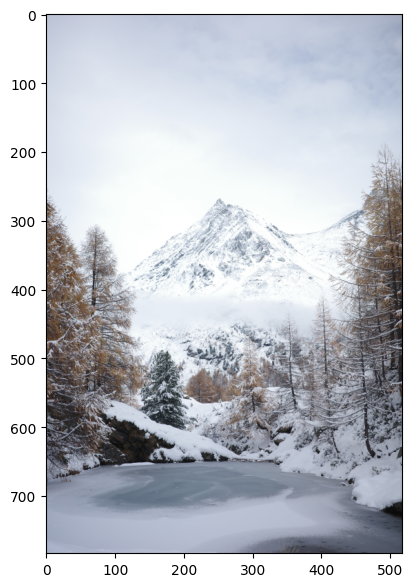

In [11]:
raw_image = cv2.imread('./dataset/snowmountain.JPG')
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB) / 255.0
img_lr = downsample_image_opencv(raw_image, [784, 518])
plt.figure(figsize=(15,7))
plt.imshow(img_lr)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


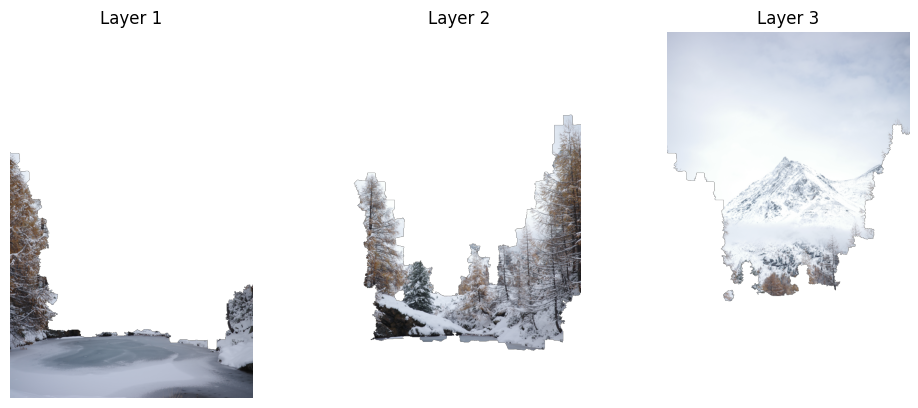

In [12]:
res_img = np.ones((img_lr.shape[0], img_lr.shape[1], 4), dtype=np.float32)
fig = plt.figure(figsize=(10, 8))
for i, group_mask in enumerate([l1, l2, l3]):
    ax = fig.add_subplot(2, 3, i + 1)
    for c in range(3):  # 遍历RGB通道
        res_img[:, :, c] = np.where(group_mask, img_lr[:, :, c], 0)
    res_img[:, :, 3] = np.where(group_mask, 1, 0)

    ax.imshow(res_img)
    ax.axis('off')
    ax.set_title(f'Layer {i+1}')

    plt.tight_layout()

In [19]:
def format_convertion(paths):
    layer_masks = []
    for p in paths:
        layer_masks.append(np.load(p))

    layers = []
    for layer in layer_masks:
        tmp = np.zeros_like(layer[0])
        for ob in layer:
            tmp += ob
        layers.append(tmp > 0)

    return layers

def viz(img_path, layers):
    depth_size=layers[0].shape
    raw_image = cv2.imread(img_path)
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB) / 255.0
    img_lr = downsample_image_opencv(raw_image, depth_size)

    res_img = np.ones((img_lr.shape[0], img_lr.shape[1], 4), dtype=np.float32)
    fig = plt.figure(figsize=(10, 8))
    for i, group_mask in enumerate(layers):
        ax = fig.add_subplot(2, 3, i + 1)
        for c in range(3):  # 遍历RGB通道
            res_img[:, :, c] = np.where(group_mask, img_lr[:, :, c], 0)
        res_img[:, :, 3] = np.where(group_mask, 1, 0)

        ax.imshow(res_img)
        ax.axis('off')
        ax.set_title(f'Layer {i+1}')

        plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


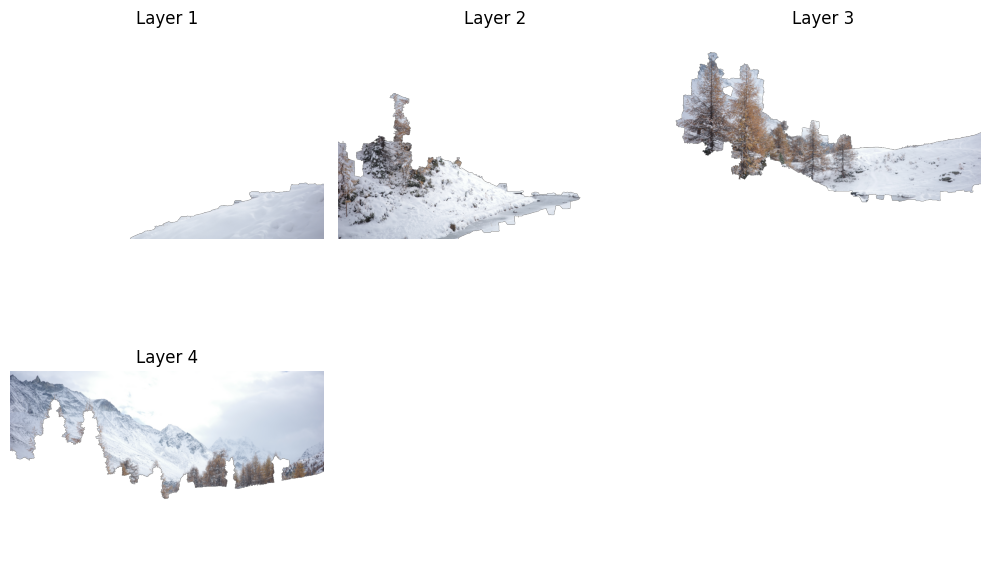

In [15]:
paths = ['./output-sam/snowmountain2/snowmountain2_layer1_segs.npy',
         './output-sam/snowmountain2/snowmountain2_layer2_segs.npy',
         './output-sam/snowmountain2/snowmountain2_layer3_segs.npy',
         './output-sam/snowmountain2/snowmountain2_layer4_segs.npy']

layers = format_convertion(paths)
viz('./dataset/snowmountain2.JPG', layers)

name = 'snowmountain2'
for i in range(len(layers)):
    with open('./output-sam/' + name + '/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])

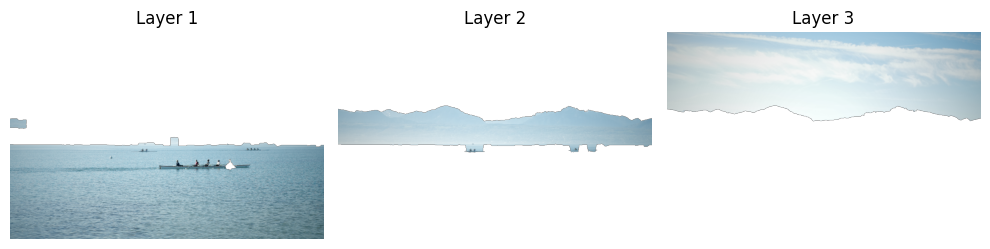

In [21]:
paths = ['./output-sam/lake/lake_layer1_segs.npy',
         './output-sam/lake/lake_layer2_segs.npy',
         './output-sam/lake/lake_layer3_segs.npy']

layers = format_convertion(paths)
viz('./dataset/lake.JPG', layers)

name = 'lake'
for i in range(len(layers)):
    with open('./output-sam/' +name + '/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])

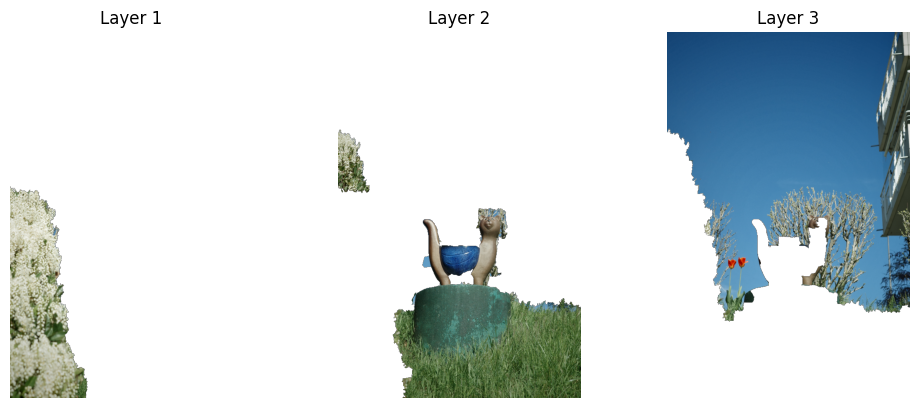

In [28]:
paths = ['./output/garden_cat_layer1_segs.npy',
         './output/garden_cat_layer2_segs.npy',
         './output/garden_cat_layer3_segs.npy']

layers = format_convertion(paths)
viz('./dataset/garden_cat.JPG', layers)

name = 'garden_cat'
for i in range(len(layers)):
    with open('./output/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


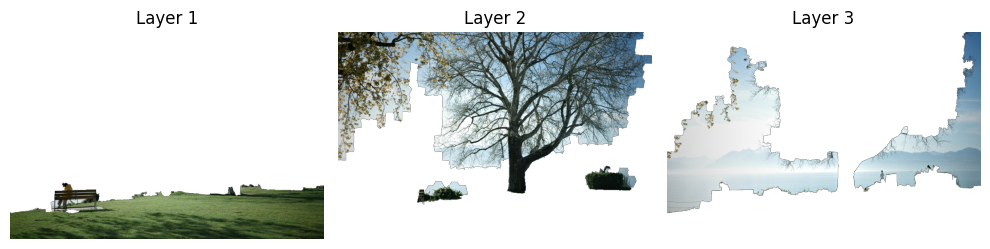

In [30]:
paths = ['./output/spring_layer1_segs.npy',
         './output/spring_layer2_segs.npy',
         './output/spring_layer3_segs.npy']

layers = format_convertion(paths)
viz('./dataset/spring.JPG', layers)

name = 'spring'
for i in range(len(layers)):
    with open('./output/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])

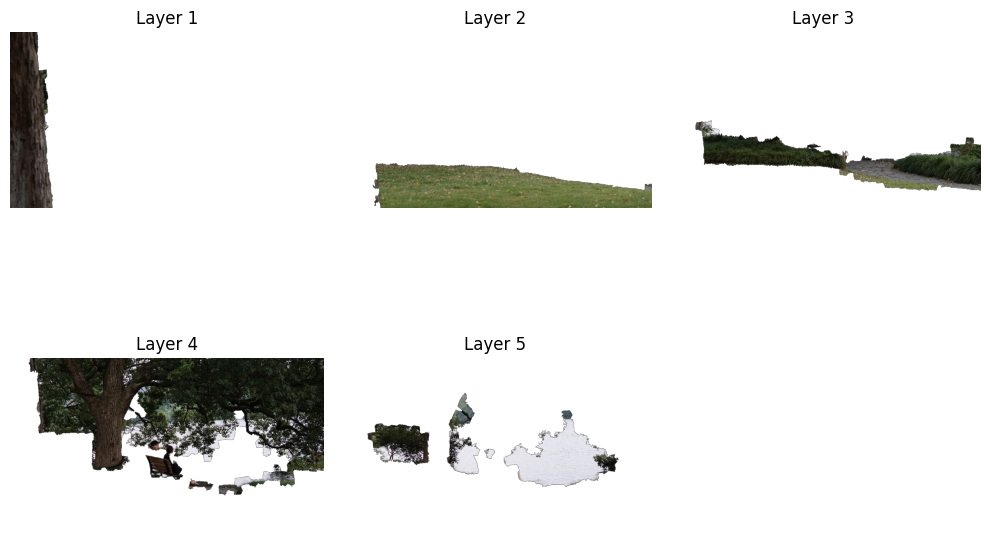

In [32]:
paths = ['./output/summer_layer1_segs.npy',
         './output/summer_layer2_segs.npy',
         './output/summer_layer3_segs.npy',
         './output/summer_layer4_segs.npy',
         './output/summer_layer5_segs.npy']

layers = format_convertion(paths)
viz('./dataset/summer.jpg', layers)

name = 'summer'
for i in range(len(layers)):
    with open('./output/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])

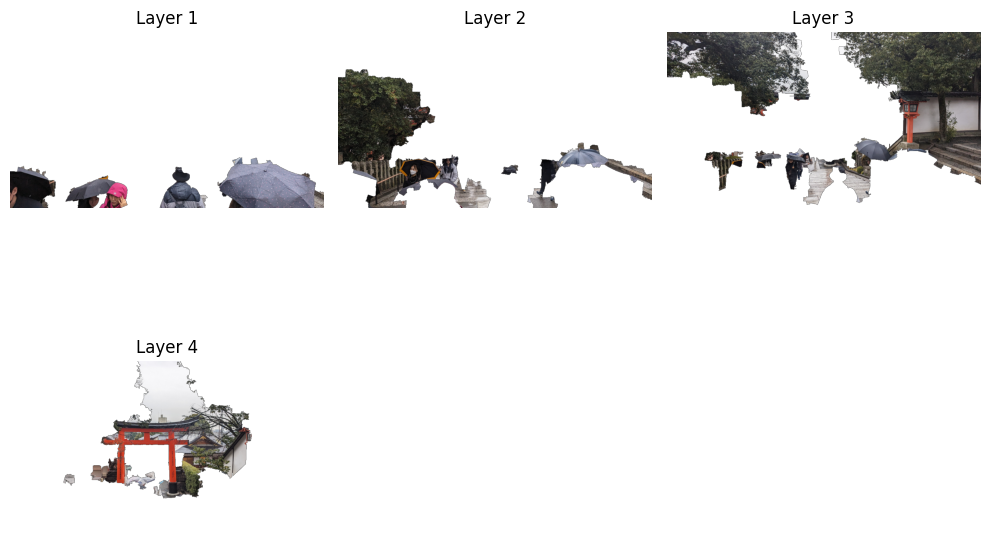

In [33]:
paths = ['./output/torri_layer1_segs.npy',
         './output/torri_layer2_segs.npy',
         './output/torri_layer3_segs.npy',
         './output/torri_layer4_segs.npy']

layers = format_convertion(paths)
viz('./dataset/torii.jpg', layers)

name = 'torri'
for i in range(len(layers)):
    with open('./output/' + name + '_' + 'layer'+str(i+1) + '_l.npy', 'wb') as f:
        np.save(f,layers[i])